<a href="https://colab.research.google.com/github/miqrom29/haplograph_WGS/blob/main/pytesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get update -y
!sudo apt-get install -y tesseract-ocr tesseract-ocr-spa
!pip install -q pytesseract pillow pdf2image


Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 https://cli.github.com/packages stable/main amd64 Packages [356 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [85.0 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,742 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [6,468 kB]
Get:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Ge

In [2]:
import pytesseract
from PIL import Image
import os, glob
from pdf2image import convert_from_path

pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"  # ruta estándar en Colab[cite:65]

# Carpeta de trabajo
BASE_DIR = "/content/censo_elche1730"
os.makedirs(BASE_DIR, exist_ok=True)


In [6]:
pdf_path = "/content/drive/MyDrive/document genealogy/padronsdElx1859_1910/elche_1733.pdf"


pages = convert_from_path(pdf_path, dpi=300)  # 300 dpi suele ir bien
img_dir = f"{BASE_DIR}/pages"
os.makedirs(img_dir, exist_ok=True)

for i, page in enumerate(pages, start=1):
    out = os.path.join(img_dir, f"page_{i:03d}.png")
    page.save(out, "PNG")

len(glob.glob(f"{img_dir}/*.png"))


86

In [4]:
!sudo apt-get update -y
!sudo apt-get install -y poppler-utils


Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0

In [5]:
from pdf2image import convert_from_path

pages = convert_from_path(pdf_path, dpi=300)


PDFPageCountError: Unable to get page count.
I/O Error: Couldn't open file '/content/censo_elche1730/content/drive/MyDrive/document genealogy/padronsdElx1859_1910/elche_1733.pdf': No such file or directory.


(np.float64(-0.5), np.float64(2000.5), np.float64(2666.5), np.float64(-0.5))

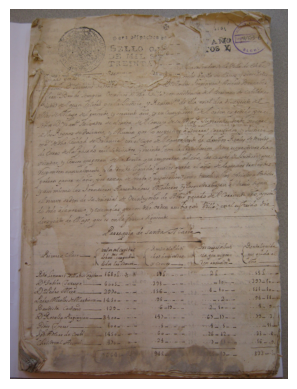

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

imgs = sorted(glob.glob(f"{img_dir}/*.png"))
len(imgs), imgs[:5]  # número de páginas y primeras rutas

# Ver una página concreta
i = 0  # cambia el índice
img = Image.open(imgs[i])
plt.imshow(img); plt.axis("off")


In [8]:
use_pages = imgs[4:42]  # Python index 0-based

def ocr_page(path):
    img = Image.open(path).convert("L")
    config = "--psm 4 --oem 1 -l spa"
    return pytesseract.image_to_string(img, config=config)

out_csv = f"{BASE_DIR}/elche1733_raw.csv"

import csv

with open(out_csv, "w", newline="", encoding="utf-8") as f:
    w = csv.writer(f, delimiter=";")
    w.writerow(["page_img", "line_no", "raw_line"])
    for img_path in use_pages:
        text = ocr_page(img_path)
        for i, line in enumerate(text.splitlines(), start=1):
            line = line.strip()
            if line:
                w.writerow([os.path.basename(img_path), i, line])

out_csv


'/content/censo_elche1730/elche1733_raw.csv'